# Classifier analysis

In this notebook, I find the precision&ndash;recall and ROC curves of classifiers.

In [12]:
import sys

import h5py
import matplotlib.pyplot as plot
import numpy
import sklearn.metrics

sys.path.insert(1, '..')
import crowdastro.train

CROWDASTRO_H5_PATH = '../crowdastro.h5'
TRAINING_H5_PATH = '../training.h5'

%matplotlib inline

## Logistic regression

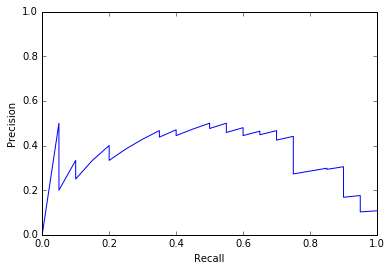

Accuracy: 90.27%


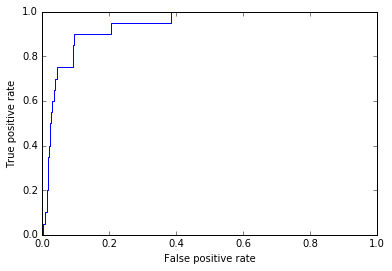

In [57]:
with h5py.File(CROWDASTRO_H5_PATH) as crowdastro_h5:
    with h5py.File(TRAINING_H5_PATH) as training_h5:
        classifier = crowdastro.train.train(crowdastro_h5, training_h5, '../classifier.pkl', classifier='lr')
        
        testing_indices = crowdastro_h5['/atlas/cdfs/testing_indices'].value
        all_astro_inputs = training_h5['astro'].value
        all_cnn_inputs = training_h5['cnn_outputs'].value
        all_inputs = numpy.hstack([all_astro_inputs, all_cnn_inputs])
        all_labels = training_h5['labels'].value
        
        inputs = all_inputs[testing_indices]
        labels = all_labels[testing_indices]
        probs = classifier.predict_proba(inputs)
        
        precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, probs[:, 1])
        plot.plot(recall, precision)
        plot.xlabel('Recall')
        plot.ylabel('Precision')
        plot.show()
        
        fpr, tpr, _ = sklearn.metrics.roc_curve(labels, probs[:, 1])
        plot.plot(fpr, tpr)
        plot.xlabel('False positive rate')
        plot.ylabel('True positive rate')
        
        print('Accuracy: {:.02%}'.format(classifier.score(inputs, labels)))

## Random forests

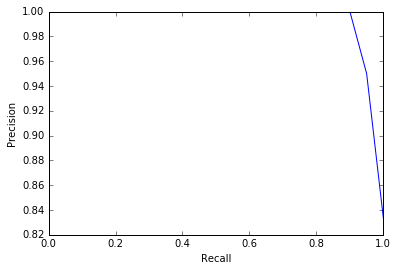

Accuracy: 99.56%


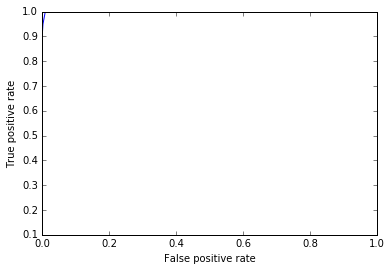

In [35]:
with h5py.File(CROWDASTRO_H5_PATH) as crowdastro_h5:
    with h5py.File(TRAINING_H5_PATH) as training_h5:
        classifier = crowdastro.train.train(crowdastro_h5, training_h5, '../classifier.pkl', classifier='rf')
        
        testing_indices = crowdastro_h5['/atlas/cdfs/testing_indices'].value
        all_astro_inputs = training_h5['astro'].value
        all_cnn_inputs = training_h5['cnn_outputs'].value
        all_inputs = numpy.hstack([all_astro_inputs, all_cnn_inputs])
        all_labels = training_h5['labels'].value
        
        inputs = all_inputs[testing_indices]
        labels = all_labels[testing_indices]
        probs = classifier.predict_proba(inputs)
        
        precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, probs[:, 1])
        plot.plot(recall, precision)
        plot.xlabel('Recall')
        plot.ylabel('Precision')
        plot.show()
        
        fpr, tpr, _ = sklearn.metrics.roc_curve(labels, probs[:, 1])
        plot.plot(fpr, tpr)
        plot.xlabel('False positive rate')
        plot.ylabel('True positive rate')
        
        print('Accuracy: {:.02%}'.format(classifier.score(inputs, labels)))